# spanish texts

## text corpus

In [17]:
import pandas as pd 

In [18]:
import pandas as pd
corpus = pd.read_csv('corpus.txt', delimiter = "\t", header=None)
corpus.columns = ['texts']

In [19]:
corpus = list(corpus['texts'])

In [24]:
corpus[:15]

['El curso está en general bien constituido ',
 'Lo mejor de él es el cuerpo docente con el cual se establece una abierta',
 'El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica',
 'Que se agregue una mesa mas en los practicos a fin ',
 'disminuir el numero de alumnos por mesas ',
 '6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado',
 'Deberian haber mas practicos ',
 'Me gustaria que se hicieran mas ayudantías antes de las pruebas ',
 'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
 'Que las solemnes sigan siendo separadas ',
 'sigan con los seminarios hechos desde la casa',
 'que se aconseje un libro para el estudio de una determinada materia',
 'capítulos a leer para obtener la información desde una fuente que le aporte para el aprendizaje.']

In [21]:
def tokenize(s):
    return s.split(' ')

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
!pip install -U pip setuptools wheel

In [25]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [26]:
!python -m spacy download es_dep_news_trf

     |████████████████████████████████| 410.0 MB 7.5 kB/s eta 0:00:012     |██████████▍                     | 133.0 MB 792 kB/s eta 0:05:50     |████████████████████▋           | 264.4 MB 853 kB/s eta 0:02:51
✔ Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [27]:
import spacy
nlp = spacy.load('es_dep_news_trf')

In [91]:
from nltk.corpus import stopwords

def clean(sentence):
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    doc = nlp(sentence)
    sentence = [token.lemma_ for token in doc if token.pos_=='NOUN']
    sentence=list(filter(None, [w.lower().translate(table) for w in sentence]))
    sentence = [w for w in sentence if w not in stopwords.words('spanish')]
    #language=[[w for w in s if w!="''"] for s in language] 
    #language=[[w for w in s if w!='̃'] for s in language] 
    sentence=[w for w in sentence if not w.isdigit()]
    return sentence

In [92]:
clean('El curso está,, en general; bien constituido ')

['curso', 'general']

## basic statistics: types and tokens

In [178]:
clean_corpus = [clean(sentence) for sentence in corpus]
clean_corpus =[s for s in clean_corpus if len(s)>1]

In [179]:
clean_corpus[:5]

[['curso', 'general'],
 ['orden', 'contenido'],
 ['acuerdo', 'contenido', 'clase', 'bibliografía'],
 ['dinamica', 'dia', 'prueba', 'práctica'],
 ['mesa', 'practico', 'fin']]

In [180]:
from collections import Counter

In [181]:
words =[item for sublist in clean_corpus for item in sublist]
number_tokens = len(words)
number_types = len(set(words))
print(number_tokens,number_types)

858 291


## graphs!

In [182]:
import networkx as nx

In [183]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW(radius=4):
    G=nx.Graph()
    for sentence in clean_corpus:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)      
    return G.subgraph(Gcc[0]).copy()

In [184]:
graph_text = GoW()

In [185]:
graph_text.nodes()

NodeView(('curso', 'general', 'orden', 'contenido', 'acuerdo', 'clase', 'bibliografía', 'dinamica', 'dia', 'prueba', 'práctica', 'mesa', 'practico', 'fin', 'numero', 'alumno', 'aprendizaje', 'ayudantía', 'vez', 'estructura', 'seminario', 'casa', 'libro', 'estudio', 'materia', 'capítulo', 'información', 'fuente', 'profesor', 'cuanto', 'limit', 'ayuda', 'practica', 'teorica', 'pelvi', 'día', 'bloque', 'atención', 'hilo', 'caso', 'instancia', 'forma', 'ayudantia', 'horario', 'yincana', 'imagenología', 'imagenologia', 'sala', 'semestre', 'distribución', 'torax', 'cuello', 'continuacion', 'relación', 'inervación', 'irrigación', 'desempeño', 'estudiante', 'disposición', 'ambiente', 'alumnado', 'guía', 'autorregulación', 'actividad', 'posibilidad', 'nota', 'control', 'revisión', 'ayudante', 'presencia', 'opción', 'video', 'operación', 'disección', 'cadaver', 'organizacion', 'patología', 'paciente', 'pregunta', 'punto', 'porcion', 'tuba', 'cámara', 'práctico', 'puesto', 'trabajo', 'dibujo', 'm

In [186]:
import matplotlib.pyplot as plt

def plot_graph(G):
    fig, ax = plt.subplots(dpi=800)
    pos = nx.spring_layout(G)
    labels={i:i for i in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size = 10, node_color='orange') 
    nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='lime')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=4,font_color='k')
    plt.axis('off')
    plt.show()

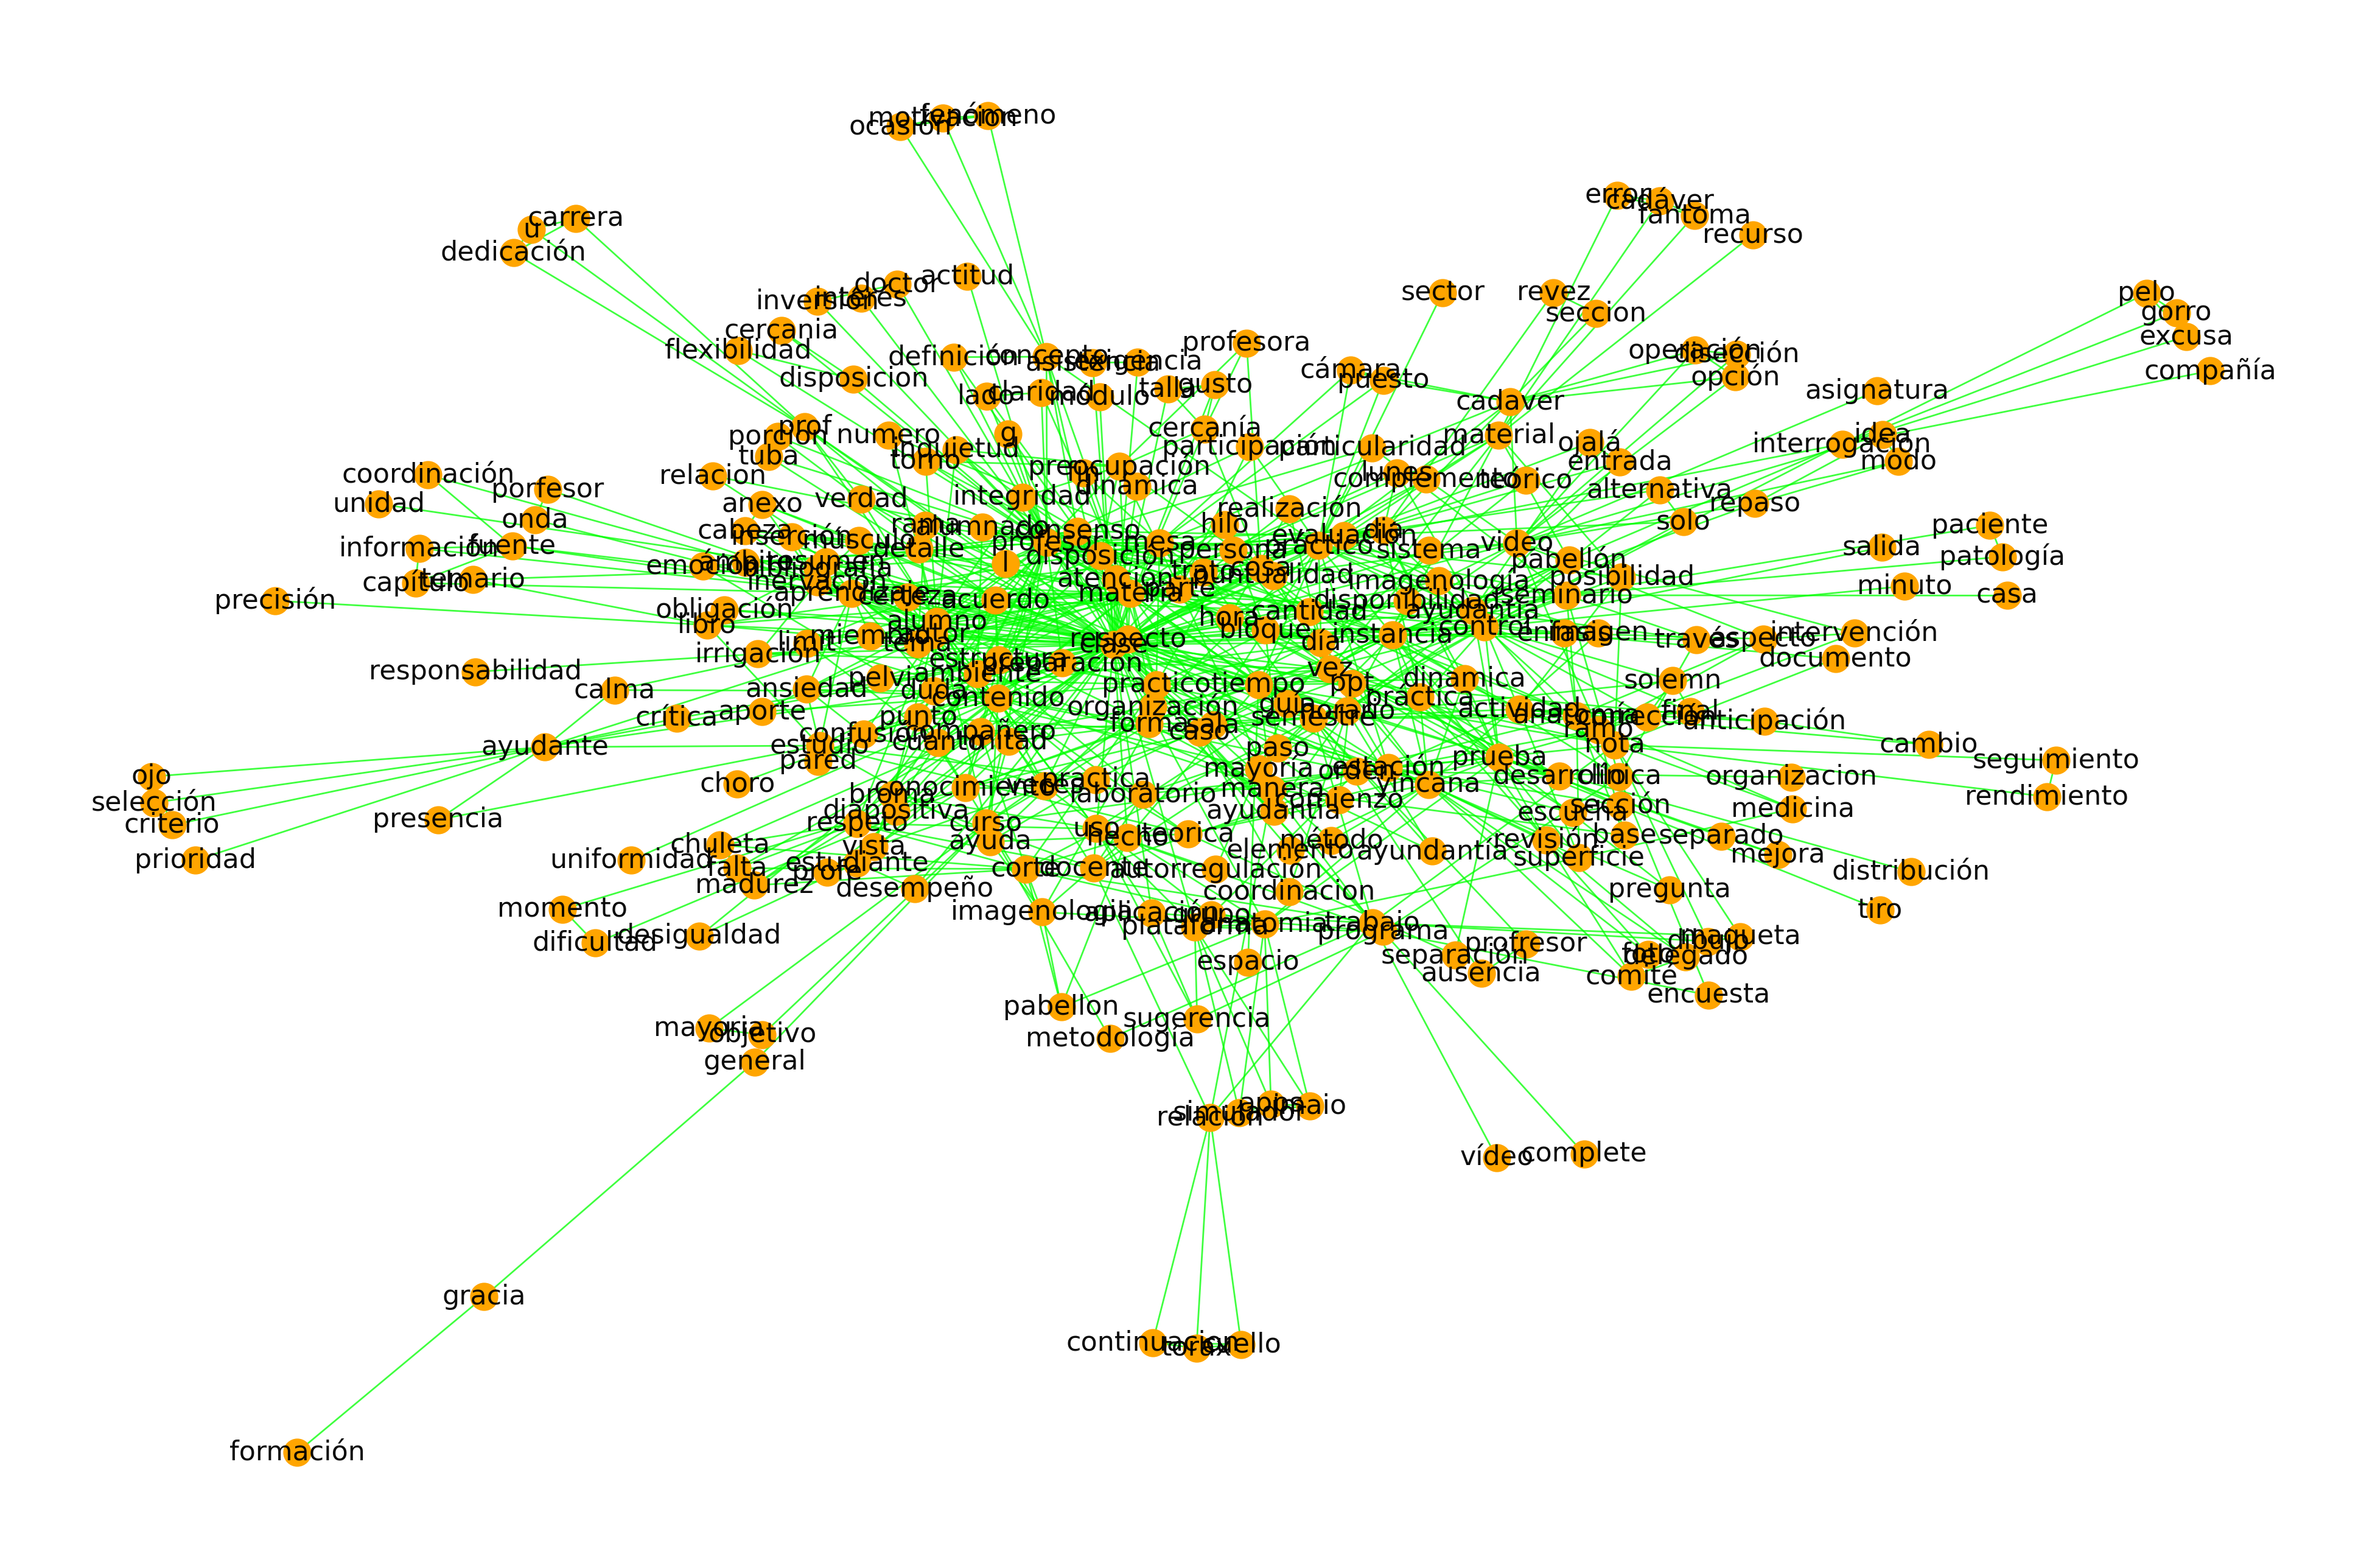

In [187]:
plot_graph(graph_text)

### main core

In [188]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
main_core = nx.k_core(graph_text)

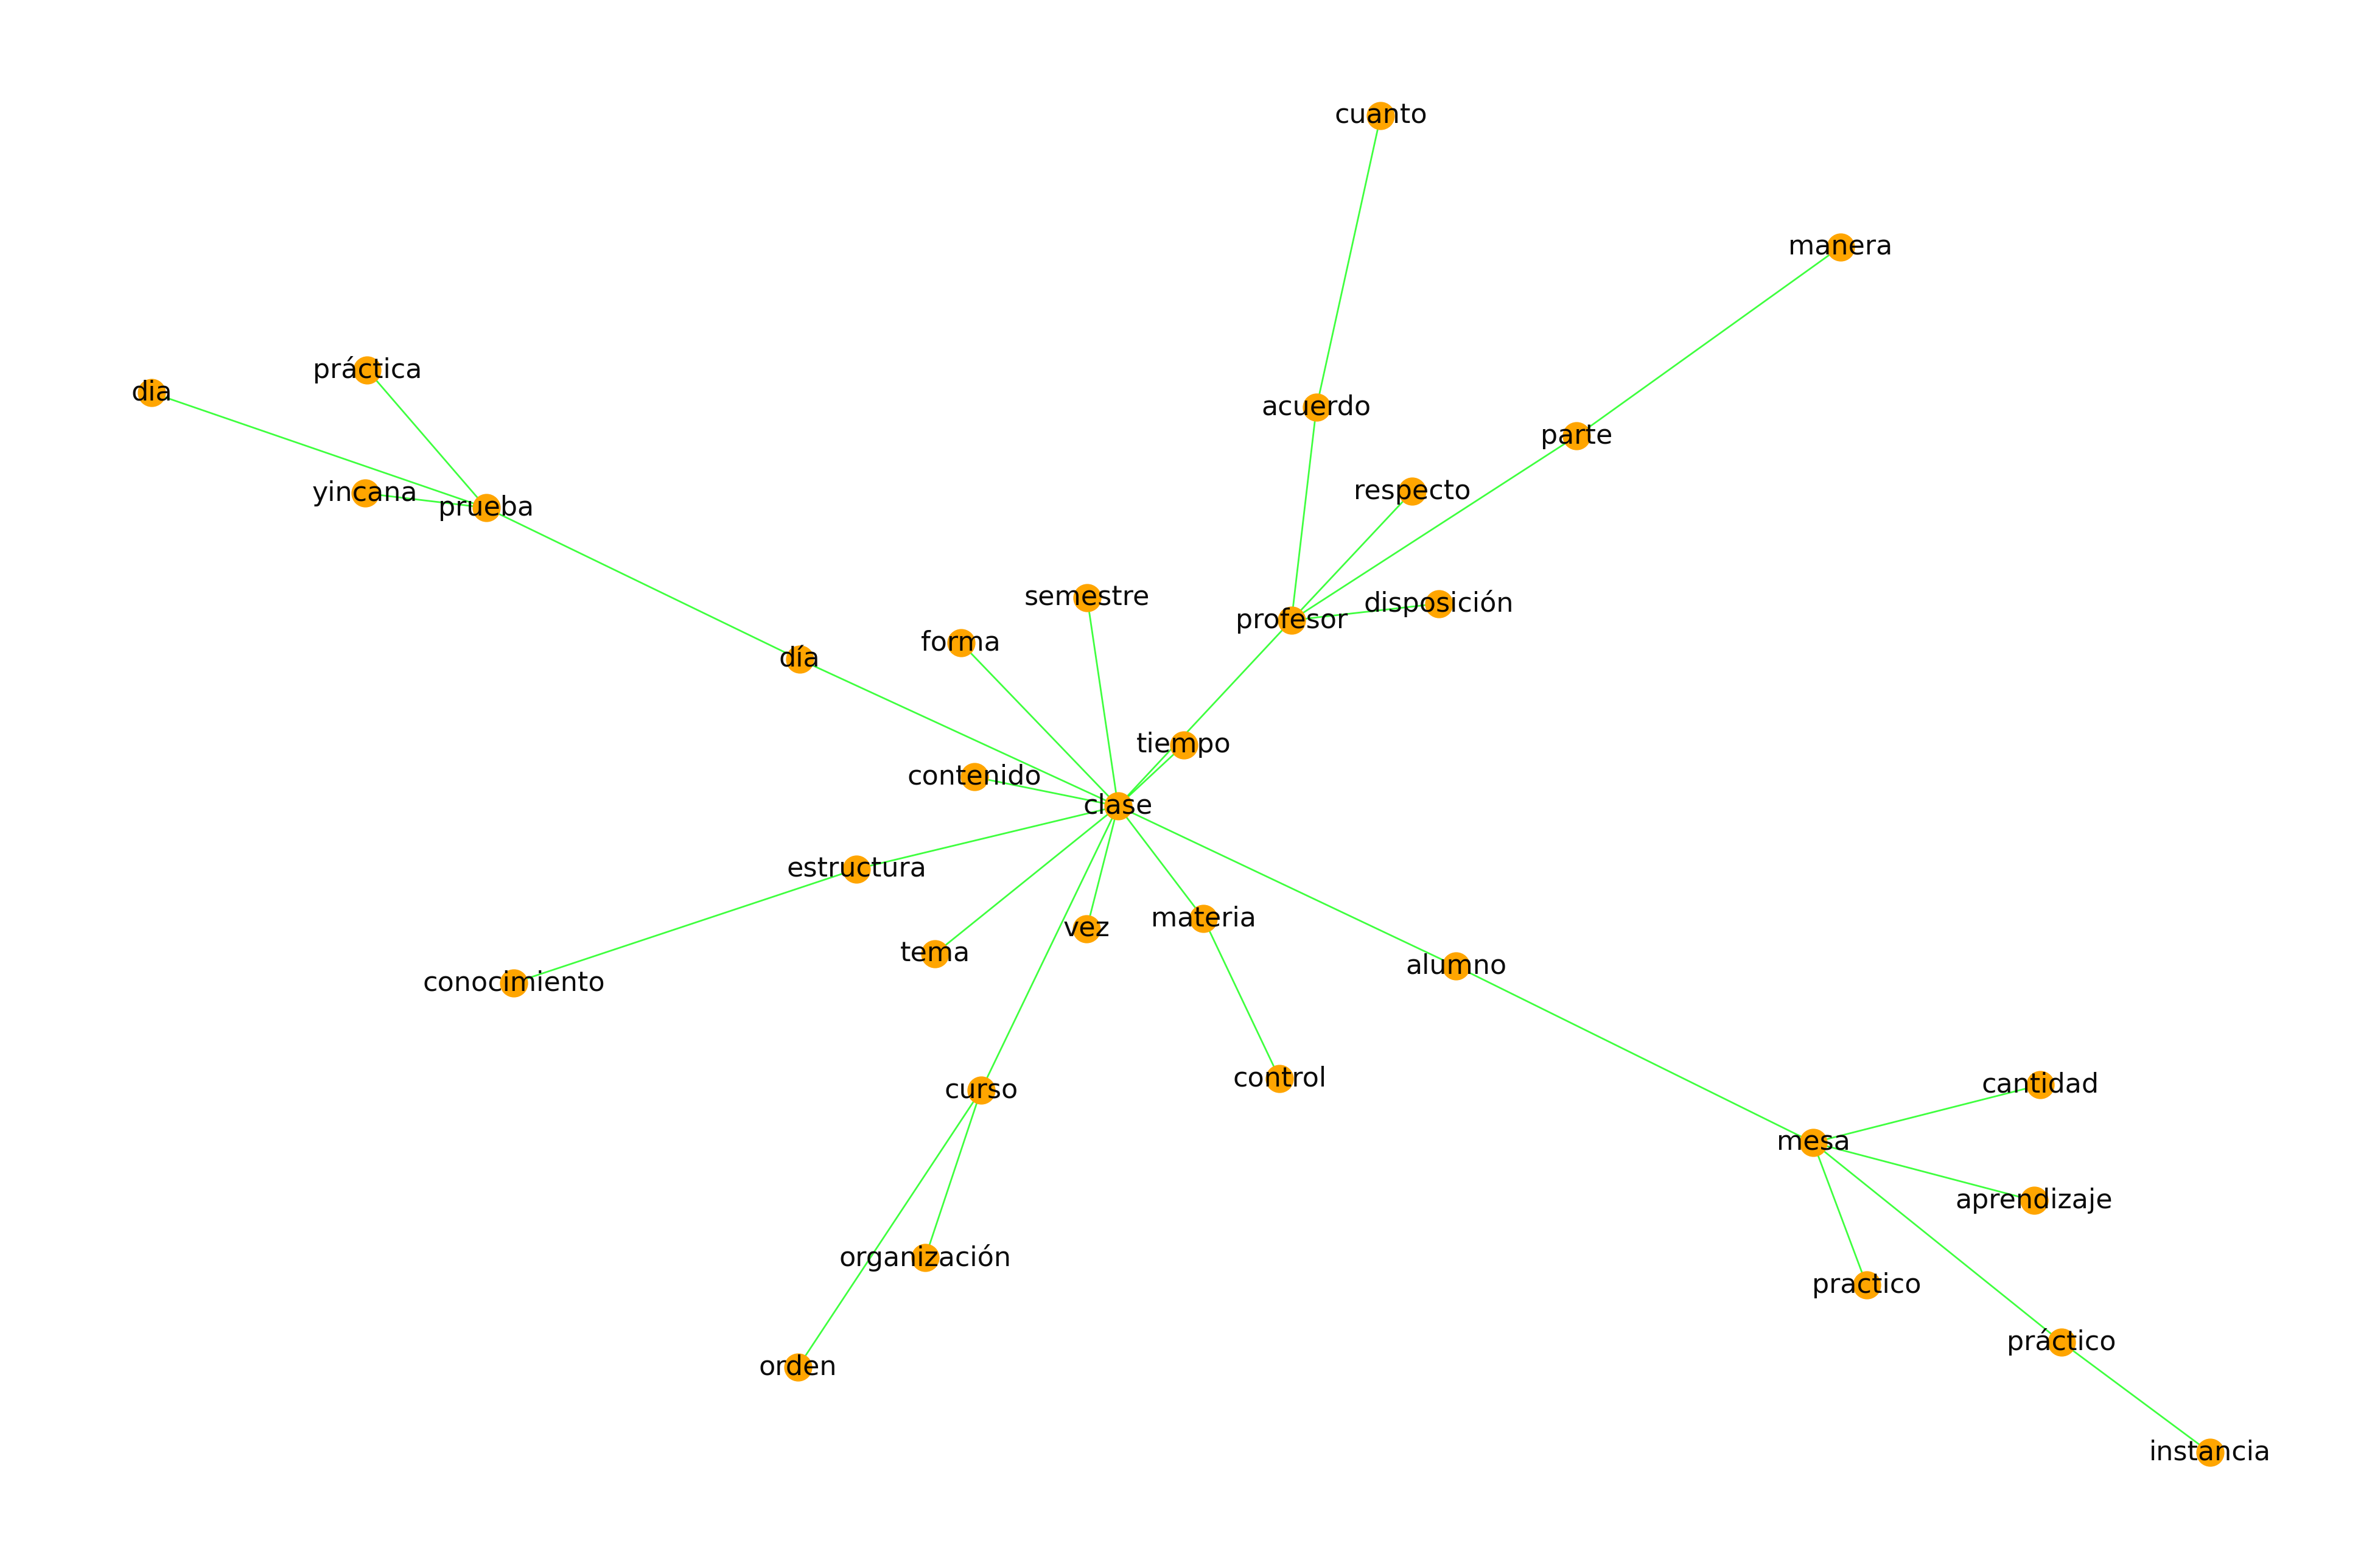

In [203]:
plot_graph(nx.maximum_spanning_tree(main_core))

## community structure

In [190]:
!pip install python-louvain

In [191]:
import community as community_louvain

In [192]:
partition = community_louvain.best_partition(main_core,resolution=1)

In [193]:
len(set(partition.values()))

4

In [194]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(partition.items()):
    v[value].append(key)

In [195]:
partition = dict(v)

In [196]:
partition

{3: ['acuerdo',
  'clase',
  'conocimiento',
  'contenido',
  'cuanto',
  'curso',
  'estructura',
  'forma',
  'manera',
  'materia',
  'organización',
  'tiempo'],
 1: ['alumno', 'aprendizaje', 'cantidad', 'mesa', 'practico', 'vez'],
 2: ['control',
  'dia',
  'día',
  'instancia',
  'orden',
  'prueba',
  'práctica',
  'práctico',
  'yincana'],
 0: ['disposición', 'parte', 'profesor', 'respecto', 'semestre', 'tema']}

In [197]:
#pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in partition.items() ]))

## clustering!

In [198]:
cluster_sentences = {group:[] for group in partition.keys()}

In [199]:
## https://aclanthology.org/W04-3252.pdf

import numpy as np

def similarity(L1,L2):
    return len(list(set(L1) & set(L2)))/(np.log(len(L1))+np.log(len(L2)))

In [200]:
import operator

for sentence in clean_corpus:
    D = {}
    for group in partition.keys():
        D[group]=similarity(sentence,partition[group])
    key=max(D.items(), key=operator.itemgetter(1))[0]
    cluster_sentences[key]+=[sentence]

In [202]:
cluster_sentences

{3: [['curso', 'general'],
  ['acuerdo', 'contenido', 'clase', 'bibliografía'],
  ['seminario', 'casa'],
  ['libro', 'estudio', 'materia'],
  ['acuerdo', 'profesor', 'cuanto', 'contenido', 'limit'],
  ['acuerdo', 'materia'],
  ['ayuda', 'contenido', 'practica', 'estudio', 'teorica'],
  ['bloque', 'día', 'atención', 'clase', 'hilo', 'materia'],
  ['ayudantia', 'horario'],
  ['teorica', 'practica'],
  ['clase', 'imagenología'],
  ['cuanto', 'imagenologia'],
  ['caso', 'seminario'],
  ['torax', 'cuello', 'continuacion', 'relación'],
  ['acuerdo', 'profesor', 'estructura', 'clase'],
  ['clase', 'inervación', 'irrigación', 'estructura'],
  ['clase', 'desempeño', 'estudiante'],
  ['guía', 'autorregulación'],
  ['ayudante', 'presencia', 'estudio'],
  ['opción', 'video', 'operación', 'disección', 'cadaver'],
  ['seminario', 'patología', 'paciente'],
  ['trabajo', 'nota', 'dibujo', 'maqueta'],
  ['trabajo', 'relación', 'manera'],
  ['bibliografía', 'temario', 'libro'],
  ['forma', 'contenido', 